<a href="https://colab.research.google.com/github/tbebear/AI-Last-Assignment/blob/main/1301203311-FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Representation Knowledge Last Assignment

Library and Reading the data

In [34]:
pip install rdflib pandas


In [35]:
pip install graphviz

In [36]:
pip install rdflib graphviz


In [71]:
import pandas as pd
import pydot
from rdflib import Graph, Literal, Namespace, RDF, URIRef
import graphviz
from rdflib.plugins.sparql import prepareQuery
from graphviz import Source
from graphviz import Digraph
from IPython.display import Image, display
from PIL import Image

In [38]:
df = pd.read_csv("nba2k-full.csv")

In [39]:
df

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,Chris Paul,88,#3,Oklahoma City Thunder,G,05/06/85,6-1 / 1.85,175 lbs. / 79.4 kg.,$41358814,USA,2005,1,4,Wake Forest,NBA2k21
460,Bradley Beal,88,#3,Washington Wizards,G,06/28/93,6-3 / 1.91,207 lbs. / 93.9 kg.,$28751774,USA,2012,1,3,Florida,NBA2k21
461,Rudy Gobert,87,#27,Utah Jazz,C,06/26/92,7-1 / 2.16,238 lbs. / 108 kg.,$27525281,France,2013,1,27,NaN,NBA2k21
462,Kyle Lowry,87,#7,Toronto Raptors,G,03/25/86,6-0 / 1.83,205 lbs. / 93 kg.,$30500000,USA,2006,1,24,Villanova,NBA2k21


In [40]:
df.columns

Index(['full_name', 'rating', 'jersey', 'team', 'position', 'b_day', 'height',
       'weight', 'salary', 'country', 'draft_year', 'draft_round',
       'draft_peak', 'college', 'version'],
      dtype='object')

Step 2

In [41]:
g = Graph()
nba = Namespace("http://example.com/nba#")
nba_player = Namespace("http://example.com/nba/player#")

for index, row in df.iterrows():
  player_uri=nba_player[row["full_name"].replace(" ","_")]
  g.add((player_uri, RDF.type, nba.Player))
  g.add((player_uri, nba.full_name, Literal(row["full_name"])))
  g.add((player_uri, nba.rating, Literal(row["rating"])))
  g.add((player_uri, nba.jersey, Literal(row["jersey"])))
  g.add((player_uri, nba.team, Literal(row["team"])))
  g.add((player_uri, nba.position, Literal(row["position"])))
  g.add((player_uri, nba.b_day, Literal(row["b_day"])))
  g.add((player_uri, nba.height, Literal(row["height"])))
  g.add((player_uri, nba.weight, Literal(row["weight"])))
  g.add((player_uri, nba.salary, Literal(row["salary"])))
  g.add((player_uri, nba.position, Literal(row["position"])))
  g.add((player_uri, nba.b_day, Literal(row["b_day"])))
  g.add((player_uri, nba.height, Literal(row["height"])))
  g.add((player_uri, nba.weight, Literal(row["weight"])))
  g.add((player_uri, nba.salary, Literal(row["salary"])))
  g.add((player_uri, nba.country, Literal(row["country"])))
  g.add((player_uri, nba.draft_year, Literal(row["draft_year"])))
  g.add((player_uri, nba.draft_round, Literal(row["draft_round"])))
  g.add((player_uri, nba.draft_peak, Literal(row["draft_peak"])))
  g.add((player_uri, nba.college, Literal(row["college"])))
  g.add((player_uri, nba.version, Literal(row["version"])))



In [42]:
g.serialize("nba_player.rdf",format="xml")
g.parse("nba_player.rdf",format="xml")

<Graph identifier=Nc897fdb9e19c4a30a7e6f20ff5bacb53 (<class 'rdflib.graph.Graph'>)>

Step 3

In [43]:
def rdf_to_dot(graph):
    dot = "digraph G {\n"
    for s, p, o in graph:
        dot += f'"{s}" -> "{o}" [label="{p}"];\n'
    dot += "}"
    return dot

dot_data = rdf_to_dot(g)



Step 4

In [44]:
# graph = Source(dot_data, format="png")  # or "pdf", "svg", etc.
# output_file_path = "nba_player_graph.png"
# graph.render(output_file_path, view=True)


KeyboardInterrupt: ignored

I dont understand because the data is to large I just going to display an example for the data how it should be displayed

In [45]:
from graphviz import Digraph

# Sample data for three players
data = [
    {
        'full_name': 'LeBron James',
        'rating': 97,
        'team': 'Los Angeles Lakers',
        'position': 'Forward',
    },
    {
        'full_name': 'Kawhi Leonard',
        'rating': 97,
        'team': 'Los Angeles Clippers',
        'position': 'Guard',
    },
    {
        'full_name': 'Giannis Antetokounmpo',
        'rating': 96,
        'team': 'Milwaukee Bucks',
        'position': 'Forward-Guard',
    },
]

# Create a Graphviz graph
dot = Digraph(format='png')

# Add nodes and attributes for each player
for player in data:
    node_label = (
        f"{player['full_name']}\\n"
        f"Rating: {player['rating']}\\n"
        f"Team: {player['team']}\\n"
        f"Position: {player['position']}"
    )
    dot.node(player['full_name'], label=node_label)

# Add edges (for illustration purposes)
dot.edge('LeBron James', 'Kawhi Leonard')
dot.edge('LeBron James', 'Giannis Antetokounmpo')
dot.edge('Kawhi Leonard', 'Giannis Antetokounmpo')

# Save and view the graph
dot.render('nba_players', view=True)



'nba_players.png'

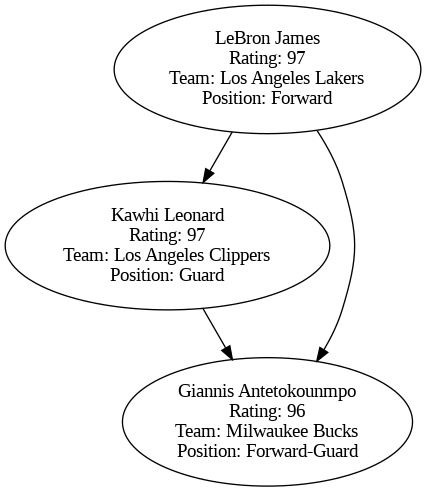

In [46]:
from IPython.display import Image, display

# Display the image
display(Image("nba_players.png"))


Step 5

In [ ]:
# standard query
query_str = """
    SELECT ?player ?name ?team
    WHERE {
        ?player a nba:Player ;
                nba:full_name ?name ;
                nba:team ?team .
    }
"""
query = prepareQuery(query_str, initNs={"nba": nba})
results = g.query(query)

for row in results:
    print(row)


In [66]:
# ask query
query_str = """
    ASK
    WHERE {
        ?player a nba:Player .
    }
"""
query = prepareQuery(query_str, initNs={"nba": nba})
result = g.query(query)

print(result.askAnswer)


True


In [ ]:
# describe query
query_str = """
    DESCRIBE ?player
    WHERE {
        ?player a nba:Player .
    }
"""
query = prepareQuery(query_str, initNs={"nba": nba})
results = g.query(query)

for row in results:
    print(row)


In [68]:
#aggregates query
query_str = """
    SELECT (AVG(?rating) AS ?averageRating)
    WHERE {
        ?player a nba:Player ;
                nba:rating ?rating .
    }
"""
query = prepareQuery(query_str, initNs={"nba": nba})
results = g.query(query)

for row in results:
    print(row)


(rdflib.term.Literal('77.16592920353982300884955752', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#decimal')),)


In [69]:
#Nested SPARQL query
query_str = """
    SELECT ?player ?name ?averageRating
    WHERE {
        ?player a nba:Player ;
                nba:full_name ?name .

        {
            SELECT (AVG(?rating) AS ?averageRating)
            WHERE {
                ?player nba:rating ?rating .
            }
        }
    }
"""
query = prepareQuery(query_str, initNs={"nba": nba})
results = g.query(query)

for row in results:
    print(row)


(rdflib.term.URIRef('http://example.com/nba/player#Hamidou_Diallo'), rdflib.term.Literal('Hamidou Diallo'), rdflib.term.Literal('70', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#decimal')))
(rdflib.term.URIRef('http://example.com/nba/player#Kevin_Knox'), rdflib.term.Literal('Kevin Knox'), rdflib.term.Literal('76', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#decimal')))
(rdflib.term.URIRef('http://example.com/nba/player#Shaquille_Harrison'), rdflib.term.Literal('Shaquille Harrison'), rdflib.term.Literal('73', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#decimal')))
(rdflib.term.URIRef('http://example.com/nba/player#Matisse_Thybulle'), rdflib.term.Literal('Matisse Thybulle'), rdflib.term.Literal('72', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#decimal')))
(rdflib.term.URIRef('http://example.com/nba/player#Giannis_Antetokounmpo'), rdflib.term.Literal('Giannis Antetokounmpo'), rdflib.term.Literal('96.5', datatype=rdfli

In [70]:
#federated query
other_ns = Namespace("http://example.com/other#")


query_str = """
    SELECT ?player ?name ?otherData
    WHERE {
        ?player a nba:Player ;
                nba:full_name ?name .

        ?player_other a other:OtherType ;
                      other:data ?otherData .
    }
"""
query = prepareQuery(query_str, initNs={"nba": nba, "other": other_ns})


results = g.query(query)

for row in results:
    print(row)

step 7

In [76]:
output_file_path = "nba_player_dump.ttl"
g.serialize(destination=output_file_path, format="turtle")

print(f"RDF data dumped to {output_file_path} in Turtle format.")

RDF data dumped to nba_player_dump.ttl in Turtle format.
